# 使用 Word Embedding 完成 IMDB 电影评论情感预测任务

TensorFlow 2.0 + Keras Embedding Layer 完成 IMDB 电影评论情感预测任务。特征单词数 10000，评论长度只考虑 20。

在 Keras 中，我们训练的 Word Embedding 中的权重 E，相当于 Embedding Layer 层的权重，同样可以用反向传播训练处这个权重。 

即是：**单词索引 -> Embedding 层 -> 对应的词向量**

### word2vec 等方式学习到的 Word Embedding 和 NN（本实例）学习到的 Word Embedding 的区别

- word2vec 是无监督的学习方式，利用上下文环境来学习词的嵌入表示，因此可以学到相关词
- 神经网络的嵌入层权重的更新是基于标签的信息进行学习，为了达到较高的监督学习的效果，它本身也可能会学到相关词。NN Embedding Layer 是随机初始化权重的。

NN 的 Embedding Layer 可用于加载训练好的词嵌入模型。例如：先用 word2vec 学到词向量，然后作为 NN 的 Embedding Layer 的初始权重，而不是用随机的初始化权重。

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.0.0'

## 通过 keras.datasets 加载数据

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 作为特征的单词个数
max_features = 10000
# 评论长度限制为 20，在这么多单词后截断文本
maxlen = 20

# 加载数据为整数列表
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 将整数列表转化为形状为 `(samples, maxlen)` 的二维整数张亮
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

## 定义模型

In [3]:
model = tf.keras.Sequential()

# Embedding 层，指定 Embedding 层的最大输入长度，以便后面将嵌入输入展平。
model.add(tf.keras.layers.Embedding(10000, 8, input_length=maxlen))
# Embedding 层之后激活的形状为 `(samples, maxlen, 8)`.

# 3 维嵌入张量展平为 2 维张量 `(samples, maxlen * 8)`
model.add(tf.keras.layers.Flatten())

# 分类器
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


## 模型训练

In [5]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 80us/sample - loss: 0.6677 - acc: 0.6295 - val_loss: 0.6157 - val_acc: 0.6990
Epoch 2/10
20000/20000 [==============================] - 1s 45us/sample - loss: 0.5394 - acc: 0.7502 - val_loss: 0.5254 - val_acc: 0.7308
Epoch 3/10
20000/20000 [==============================] - 1s 52us/sample - loss: 0.4601 - acc: 0.7893 - val_loss: 0.4990 - val_acc: 0.7476
Epoch 4/10
20000/20000 [==============================] - 1s 53us/sample - loss: 0.4213 - acc: 0.8070 - val_loss: 0.4919 - val_acc: 0.7536
Epoch 5/10
20000/20000 [==============================] - 1s 56us/sample - loss: 0.3950 - acc: 0.8233 - val_loss: 0.4922 - val_acc: 0.7562
Epoch 6/10
20000/20000 [==============================] - 1s 55us/sample - loss: 0.3746 - acc: 0.8339 - val_loss: 0.4959 - val_acc: 0.7524
Epoch 7/10
20000/20000 [==============================] - 1s 59us/sample - loss: 0.3553 - acc: 0.8456 - val_loss: 0.5

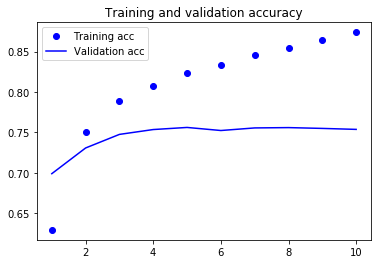

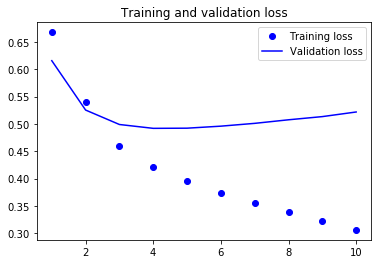

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()